In [1]:
#Imports

In [1]:
import os
import numpy as np
from PIL import Image, ImageFilter
import cv2
import torch,torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt 
%matplotlib inline

# Dataset Study

## UTKFace Dataset

In [2]:
root_dir = "D:/SupraAI Project/BinarySplit/"

class_dirs = os.listdir(root_dir)

for class_dir in class_dirs:
    class_path = os.path.join(root_dir, class_dir)

    img_files = os.listdir(class_path)
    
    num_images = len(img_files)
    
    img_path = os.path.join(class_path, img_files[0])
    img = Image.open(img_path)
    img_size = img.size
    num_channels = len(img.getbands())
    storage_format = img.format
    
    print("Class:", class_dir)
    print("Number of images:", num_images)
    print("Image size:", img_size)
    print("Number of channels:", num_channels)
    print("Storage format:", storage_format)
    print()

Class: GreaterThan29
Number of images: 12341
Image size: (200, 200)
Number of channels: 3
Storage format: JPEG

Class: LessThan28
Number of images: 11365
Image size: (200, 200)
Number of channels: 3
Storage format: JPEG



In [3]:
root_dir = "D:/SupraAI Project/Adience/Adience/"

class_dirs = os.listdir(root_dir)

for class_dir in class_dirs:
    class_path = os.path.join(root_dir, class_dir)
    
    img_files = os.listdir(class_path)
    
    num_images = len(img_files)
    
    img_path = os.path.join(class_path, img_files[0])
    img = Image.open(img_path)
    img_size = img.size
    num_channels = len(img.getbands())
    storage_format = img.format
    
    print("Class:", class_dir)
    print("Number of images:", num_images)
    print("Image size:", img_size)
    print("Number of channels:", num_channels)
    print("Storage format:", storage_format)
    print()

Class: 0-3
Number of images: 1829
Image size: (816, 816)
Number of channels: 3
Storage format: JPEG

Class: 15-23
Number of images: 938
Image size: (816, 816)
Number of channels: 3
Storage format: JPEG

Class: 25-36
Number of images: 3001
Image size: (816, 816)
Number of channels: 3
Storage format: JPEG

Class: 38-48
Number of images: 1419
Image size: (816, 816)
Number of channels: 3
Storage format: JPEG

Class: 4-6
Number of images: 1471
Image size: (816, 816)
Number of channels: 3
Storage format: JPEG

Class: 48-58
Number of images: 577
Image size: (816, 816)
Number of channels: 3
Storage format: JPEG

Class: 60-100
Number of images: 505
Image size: (816, 816)
Number of channels: 3
Storage format: JPEG

Class: 8-13
Number of images: 1290
Image size: (816, 816)
Number of channels: 3
Storage format: JPEG



In [4]:
root_dir = "D:/SupraAI Project/Appa-Real/Appa-Real/"

class_dirs = os.listdir(root_dir)

for class_dir in class_dirs:
    class_path = os.path.join(root_dir, class_dir)
    
    img_files = os.listdir(class_path)
    
    num_images = len(img_files)
    
    img_path = os.path.join(class_path, img_files[0])
    img = Image.open(img_path)
    img_size = img.size
    num_channels = len(img.getbands())
    storage_format = img.format
    
    # Print the information about the class
    print("Class:", class_dir)
    print("Number of images:", num_images)
    print("Image size:", img_size)
    print("Number of channels:", num_channels)
    print("Storage format:", storage_format)
    print()

Class: Class_0_ Age_1To18
Number of images: 1696
Image size: (321, 321)
Number of channels: 3
Storage format: JPEG

Class: Class_1_ Age_19To25
Number of images: 1419
Image size: (419, 418)
Number of channels: 3
Storage format: JPEG

Class: Class_2_ Age_26To32
Number of images: 1456
Image size: (897, 898)
Number of channels: 3
Storage format: JPEG

Class: Class_3_ Age_32To45
Number of images: 1577
Image size: (157, 156)
Number of channels: 3
Storage format: JPEG

Class: Class_5_ Age_45plus
Number of images: 1443
Image size: (1000, 598)
Number of channels: 3
Storage format: JPEG



In [2]:
transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

utkface_dataset = ImageFolder("D:/SupraAI Project/BinarySplit/", transform=transforms)

adience_dataset = ImageFolder("D:/SupraAI Project/Adience/Adience/", transform=transforms)

appa_dataset = ImageFolder("D:/SupraAI Project/Appa-Real/Appa-Real/", transform=transforms)

In [3]:
def compute_std_per_class(dataset):
    class_std = torch.zeros(len(dataset.classes))
    class_count = torch.zeros(len(dataset.classes))
    for i in range(len(dataset)):
        img, label = dataset[i]
        class_std[label] += torch.std(img)
        class_count[label] += 1

    for i in range(len(dataset.classes)):
        class_std[i] /= class_count[i]

    return class_std

utkface_std = compute_std_per_class(utkface_dataset)
adience_std = compute_std_per_class(adience_dataset)
appa_std = compute_std_per_class(appa_dataset)

# Print the results
print("UTKFace Standard Deviation per Class:", utkface_std)
print("Adience Standard Deviation per Class:", adience_std)
print("Appa-Real Standard Deviation per Class:", appa_std)

UTKFace Standard Deviation per Class: tensor([0.2167, 0.2286])
Adience Standard Deviation per Class: tensor([0.2429, 0.2306, 0.2309, 0.2245, 0.2237, 0.2197, 0.2194, 0.2129])
Appa-Real Standard Deviation per Class: tensor([0.2494, 0.2593, 0.2604, 0.2589, 0.2545])


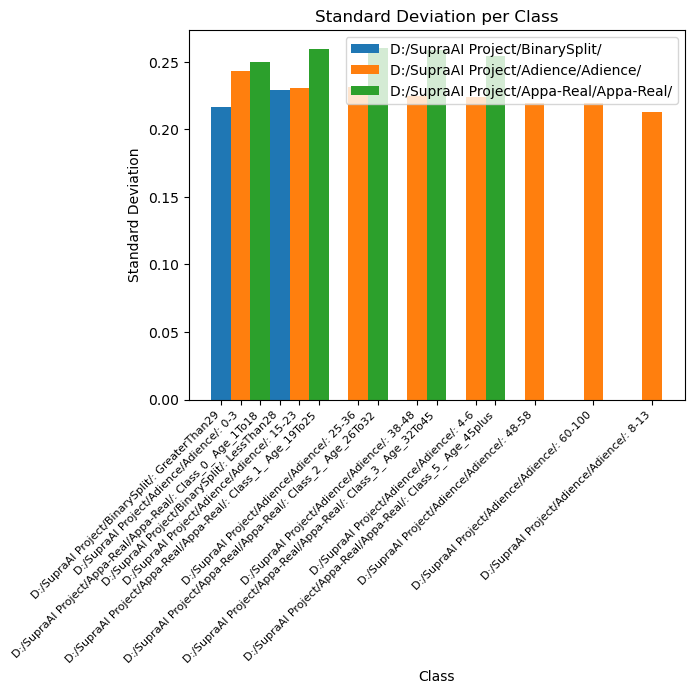

In [7]:
import matplotlib.pyplot as plt

def plot_std_per_class(*std_per_class_datasets):
    fig, ax = plt.subplots()
    width = 1.0 / len(std_per_class_datasets)
    x = []
    class_labels = []
    for i, (std_per_class, dataset) in enumerate(std_per_class_datasets):
        class_count = len(dataset.classes)
        x += [j + (i - 0.5) * width for j in range(class_count)]
        class_labels += [f"{dataset.root}: {c}" for c in dataset.classes]
        ax.bar(x[-class_count:], std_per_class, width=width, label=dataset.root)
    ax.set_xticks(x)
    ax.set_xticklabels(class_labels, rotation=45, ha='right', fontsize=8)
    ax.set_xlabel('Class')
    ax.set_ylabel('Standard Deviation')
    ax.set_title('Standard Deviation per Class')
    ax.legend()

plot_std_per_class((utkface_std, utkface_dataset), (adience_std, adience_dataset), (appa_std, appa_dataset))
plt.show()

# Time to process one epoch

In [1]:
import os
import numpy as np
from PIL import Image, ImageFilter
import cv2
import torch,torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.preprocessing import label_binarize
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
def load_data(path, test_split, val_split, batch_size, input_size):
    
    transform_dict={'src':transforms.Compose([transforms.RandomHorizontalFlip(),
                                              transforms.Resize((224,224)),
                      transforms.RandomVerticalFlip(),
                      transforms.RandomRotation(15),
                      transforms.ToTensor(),
                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])}
    
    data1 = datasets.ImageFolder(root=path,transform =transform_dict['src'])
    test_size=int(len(data1)*test_split)
    val_size=int(len(data1)*val_split)
    train_size=len(data1)-val_size-test_size
    train_dataset,test_dataset,val_dataset = torch.utils.data.random_split(data1,[train_size,test_size,val_size])
    data_loader_train=DataLoader(train_dataset,batch_size,shuffle=True)
    data_loader_test=DataLoader(test_dataset,batch_size,shuffle=False)
    data_loader_val=DataLoader(val_dataset,batch_size,shuffle=False)  
    return data_loader_train, data_loader_test, data_loader_val

### UTKFace Dataset

In [3]:
train_loader,test_loader,val_loader=load_data(path=r'D:/ConcordiaU/Winter 23/AI/Project/Datasets/2. UTKFace/BinarySplit/', 
                                              test_split=0.1,val_split= 0.1,batch_size=16, input_size=[224,224])


import torch
from torchsummary import summary
## Change model name here!
model = torchvision.models.shufflenet_v2_x1_0(pretrained=False, num_classes=2)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

###### Resnet18

In [6]:
import time
start_time = time.time()
for epoch in range(1):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

end_time = time.time()
print("Time taken for one epoch: ", end_time - start_time, "seconds")

Time taken for one epoch:  737.0693242549896 seconds


###### MobileNet_V2

In [4]:
import time
start_time = time.time()
for epoch in range(1):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

end_time = time.time()
print("Time taken for one epoch: ", end_time - start_time, "seconds")

Time taken for one epoch:  991.6478915214539 seconds


###### ShuffleNet

In [4]:
import time
start_time = time.time()
for epoch in range(1):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

end_time = time.time()
print("Time taken for one epoch: ", end_time - start_time, "seconds")

Time taken for one epoch:  478.5336947441101 seconds


## Adience Dataset

In [3]:
train_loader,test_loader,val_loader=load_data(path=r'D:/ConcordiaU/Winter 23/AI/Project/Datasets/3. Adience/FinalDataset/Adience/', 
                                              test_split=0.1,val_split= 0.1,batch_size=16, input_size=[224,224])


import torch
from torchsummary import summary
## Change model name here!
model = torchvision.models.shufflenet_v2_x1_0(pretrained=False, num_classes=8)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

###### Resnet

In [4]:
import time
start_time = time.time()
for epoch in range(1):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

end_time = time.time()
print("Time taken for one epoch: ", end_time - start_time, "seconds")

Time taken for one epoch:  565.8808748722076 seconds


###### MobileNet_V2

In [4]:
import time
start_time = time.time()
for epoch in range(1):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

end_time = time.time()
print("Time taken for one epoch: ", end_time - start_time, "seconds")

Time taken for one epoch:  666.6886074542999 seconds


###### ShuffleNet

In [4]:
import time
start_time = time.time()
for epoch in range(1):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

end_time = time.time()
print("Time taken for one epoch: ", end_time - start_time, "seconds")

Time taken for one epoch:  451.7370038032532 seconds


# Appa-Real Dataset

In [4]:
train_loader,test_loader,val_loader=load_data(path=r'D:/ConcordiaU/Winter 23/AI/Project/Datasets/1. APPA-REAL/FinalDataset\Appa-Real/', 
                                              test_split=0.1,val_split= 0.1,batch_size=16, input_size=[224,224])


import torch
from torchsummary import summary
## Change model name here!
model = torchvision.models.shufflenet_v2_x1_0(pretrained=False, num_classes=8)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

###### Resnet

In [4]:
import time
start_time = time.time()
for epoch in range(1):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

end_time = time.time()
print("Time taken for one epoch: ", end_time - start_time, "seconds")

Time taken for one epoch:  286.24693489074707 seconds


###### MobileNet_V2

In [4]:
import time
start_time = time.time()
for epoch in range(1):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

end_time = time.time()
print("Time taken for one epoch: ", end_time - start_time, "seconds")

Time taken for one epoch:  527.5668280124664 seconds


###### ShuffleNet

In [5]:
import time
start_time = time.time()
for epoch in range(1):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

end_time = time.time()
print("Time taken for one epoch: ", end_time - start_time, "seconds")

Time taken for one epoch:  272.1832044124603 seconds


# Flop Calculations

##### UTKFace Dataset

###### RESNET-18

In [6]:
import os
import numpy as np
from PIL import Image, ImageFilter
import cv2
import torch,torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt 
%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
def load_data(path, test_split, val_split, batch_size, input_size):
    
    transform_dict={'src':transforms.Compose([transforms.RandomHorizontalFlip(),
                                              transforms.Resize((224,224)),
                      transforms.RandomVerticalFlip(),
                      transforms.RandomRotation(15),
                      transforms.ToTensor(),
                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])}
    
    data1 = datasets.ImageFolder(root=path,transform =transform_dict['src'])
    test_size=int(len(data1)*test_split)
    val_size=int(len(data1)*val_split)
    train_size=len(data1)-val_size-test_size
    train_dataset,test_dataset,val_dataset = torch.utils.data.random_split(data1,[train_size,test_size,val_size])
    data_loader_train=DataLoader(train_dataset,batch_size,shuffle=True)
    data_loader_test=DataLoader(test_dataset,batch_size,shuffle=False)
    data_loader_val=DataLoader(val_dataset,batch_size,shuffle=False)  
    return data_loader_train, data_loader_test, data_loader_val

In [8]:
train_loader,test_loader,val_loader=load_data(path=r'D:/ConcordiaU/Winter 23/AI/Project/Datasets/2. UTKFace/BinarySplit/', 
                                              test_split=0.1,val_split= 0.1,batch_size=16, input_size=[224,224])


import torch
from torchsummary import summary

model = torchvision.models.resnet18(pretrained=False, num_classes=2)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cpu' if torch.cuda.is_available() else 'cuda')
model = model.to(device)
#summary(model, (3, 224, 224))

# FLOPS calculation
flops = 0
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        flops += 2 * module.in_channels * module.out_channels * module.kernel_size[0] ** 2 * (224 // module.stride[0]) ** 2
    elif isinstance(module, torch.nn.Linear):
        flops += 2 * module.in_features * module.out_features

print(f"FLOPS: {flops / 1e9:.3f} billion")

FLOPS: 990.436 billion


######  Mobilenet_v2

In [4]:
train_loader,test_loader,val_loader=load_data(path=r'D:/ConcordiaU/Winter 23/AI/Project/Datasets/2. UTKFace/BinarySplit/', 
                                              test_split=0.1,val_split= 0.1,batch_size=16, input_size=[224,224])

import torch
from torchsummary import summary

model = torchvision.models.mobilenet_v2(pretrained=False, num_classes=2)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cpu' if torch.cuda.is_available() else 'cuda')
model = model.to(device)
#summary(model, (3, 224, 224))

# FLOPS calculation
flops = 0
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        flops += 2 * module.in_channels * module.out_channels * module.kernel_size[0] ** 2 * (224 // module.stride[0]) ** 2
    elif isinstance(module, torch.nn.Linear):
        flops += 2 * module.in_features * module.out_features

print(f"FLOPS: {flops / 1e9:.3f} billion")

FLOPS: 4018.565 billion


######  ShuffleNet

In [4]:
train_loader,test_loader,val_loader=load_data(path=r'D:/ConcordiaU/Winter 23/AI/Project/Datasets/2. UTKFace/BinarySplit/', 
                                              test_split=0.1,val_split= 0.1,batch_size=16, input_size=[224,224])


import torch
from torchsummary import summary

model = torchvision.models.shufflenet_v2_x1_0(pretrained=False, num_classes=2)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cpu' if torch.cuda.is_available() else 'cuda')
model = model.to(device)
#summary(model, (3, 224, 224))

# FLOPS calculation
flops = 0
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        flops += 2 * module.in_channels * module.out_channels * module.kernel_size[0] ** 2 * (224 // module.stride[0]) ** 2
    elif isinstance(module, torch.nn.Linear):
        flops += 2 * module.in_features * module.out_features

print(f"FLOPS: {flops / 1e9:.3f} billion")

FLOPS: 393.202 billion


## Adience Dataset

###### RESNET-18

In [4]:
train_loader,test_loader,val_loader=load_data(path=r'D:/ConcordiaU/Winter 23/AI/Project/Datasets/3. Adience/FinalDataset/Adience/', 
                                              test_split=0.1,val_split= 0.1,batch_size=16, input_size=[224,224])



import torch
from torchsummary import summary

model = torchvision.models.resnet18(pretrained=False, num_classes=8)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cpu' if torch.cuda.is_available() else 'cuda')
model = model.to(device)
#summary(model, (3, 224, 224))

# FLOPS calculation
flops = 0
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        flops += 2 * module.in_channels * module.out_channels * module.kernel_size[0] ** 2 * (224 // module.stride[0]) ** 2
    elif isinstance(module, torch.nn.Linear):
        flops += 2 * module.in_features * module.out_features

print(f"FLOPS: {flops / 1e9:.3f} billion")

FLOPS: 990.436 billion


######  MobileNet_V2

In [4]:
train_loader,test_loader,val_loader=load_data(path=r'D:/ConcordiaU/Winter 23/AI/Project/Datasets/3. Adience/FinalDataset/Adience/', 
                                              test_split=0.1,val_split= 0.1,batch_size=16, input_size=[224,224])



import torch
from torchsummary import summary

model = torchvision.models.mobilenet_v2(pretrained=False, num_classes=8)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cpu' if torch.cuda.is_available() else 'cuda')
model = model.to(device)
#summary(model, (3, 224, 224))

# FLOPS calculation
flops = 0
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        flops += 2 * module.in_channels * module.out_channels * module.kernel_size[0] ** 2 * (224 // module.stride[0]) ** 2
    elif isinstance(module, torch.nn.Linear):
        flops += 2 * module.in_features * module.out_features

print(f"FLOPS: {flops / 1e9:.3f} billion")

FLOPS: 4018.565 billion


######  ShuffleNet

In [4]:
train_loader,test_loader,val_loader=load_data(path=r'D:/ConcordiaU/Winter 23/AI/Project/Datasets/3. Adience/FinalDataset/Adience/', 
                                              test_split=0.1,val_split= 0.1,batch_size=16, input_size=[224,224])

import torch
from torchsummary import summary

model = torchvision.models.shufflenet_v2_x1_0(pretrained=False, num_classes=8)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cpu' if torch.cuda.is_available() else 'cuda')
model = model.to(device)
#summary(model, (3, 224, 224))

# FLOPS calculation
flops = 0
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        flops += 2 * module.in_channels * module.out_channels * module.kernel_size[0] ** 2 * (224 // module.stride[0]) ** 2
    elif isinstance(module, torch.nn.Linear):
        flops += 2 * module.in_features * module.out_features

print(f"FLOPS: {flops / 1e9:.3f} billion")

FLOPS: 393.202 billion


## Appa-Real

######  RESNET18

In [5]:
train_loader,test_loader,val_loader=load_data(path=r'D:/ConcordiaU/Winter 23/AI/Project/Datasets/1. APPA-REAL/FinalDataset\Appa-Real/', 
                                              test_split=0.1,val_split= 0.1,batch_size=16, input_size=[224,224])



import torch
from torchsummary import summary

model = torchvision.models.resnet18(pretrained=False, num_classes=8)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cpu' if torch.cuda.is_available() else 'cuda')
model = model.to(device)
#summary(model, (3, 224, 224))

# FLOPS calculation
flops = 0
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        flops += 2 * module.in_channels * module.out_channels * module.kernel_size[0] ** 2 * (224 // module.stride[0]) ** 2
    elif isinstance(module, torch.nn.Linear):
        flops += 2 * module.in_features * module.out_features

print(f"FLOPS: {flops / 1e9:.3f} billion")

FLOPS: 990.436 billion


######  MobileNet_V2

In [9]:
train_loader,test_loader,val_loader=load_data(path=r'D:/ConcordiaU/Winter 23/AI/Project/Datasets/1. APPA-REAL/FinalDataset\Appa-Real/', 
                                              test_split=0.1,val_split= 0.1,batch_size=16, input_size=[224,224])



import torch
from torchsummary import summary

model = torchvision.models.mobilenet_v2(pretrained=False, num_classes=8)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cpu' if torch.cuda.is_available() else 'cuda')
model = model.to(device)
#summary(model, (3, 224, 224))

# FLOPS calculation
flops = 0
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        flops += 2 * module.in_channels * module.out_channels * module.kernel_size[0] ** 2 * (224 // module.stride[0]) ** 2
    elif isinstance(module, torch.nn.Linear):
        flops += 2 * module.in_features * module.out_features

print(f"FLOPS: {flops / 1e9:.3f} billion")

FLOPS: 4018.565 billion


######  ShuffleNet

In [10]:
train_loader,test_loader,val_loader=load_data(path=r'D:/ConcordiaU/Winter 23/AI/Project/Datasets/1. APPA-REAL/FinalDataset\Appa-Real/', 
                                              test_split=0.1,val_split= 0.1,batch_size=16, input_size=[224,224])

import torch
from torchsummary import summary

model = torchvision.models.shufflenet_v2_x1_0(pretrained=False, num_classes=8)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device('cpu' if torch.cuda.is_available() else 'cuda')
model = model.to(device)
#summary(model, (3, 224, 224))

# FLOPS calculation
flops = 0
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        flops += 2 * module.in_channels * module.out_channels * module.kernel_size[0] ** 2 * (224 // module.stride[0]) ** 2
    elif isinstance(module, torch.nn.Linear):
        flops += 2 * module.in_features * module.out_features

print(f"FLOPS: {flops / 1e9:.3f} billion")

FLOPS: 393.202 billion


### 